# Import Module

In [1]:
from Modules.BCR import BCR

# ESP operation

The module `Modules.ESP` contains the class `ESP` which can be called to operate **a single axis** of the physical ESP. The syntax is `ESP(axis, MAX_POSITION, testflight)`, where `axis` can be 1-3, corresponding to the connected devices on the ESP. `MAX_POSITION` is a two-element list defining the bounds of the axis in degress. Finally, the boolean `testflight` can be set to `True` to test and run code without having any physical devices connected. 
The class BCR initializes all axes of the ESP as seperate objects.

## Setting up the ESP home positions
Every time the ESP is switched on, the current positions of the axes will be defined as 0. For obvious reasons this is not very confenient. Therefore it is good practice to redefine your home positions (angle = 0) before you start a measurement run. This can be done by calling the function `ESP.define_home()`
.
## Moving the ESP
There are a number of different commands to move the initialized axes, and luckily they are all very straightforward.
```
ESP.get_current_position() -> float
ESP.move(degrees, mode, verbose=True), mode in ['home','absolute','relative']
```
To send an ASCII command directly to the ESP, you can use the function `ESP.send_ASCII_command(command)`. This function returns `True` if the command was sent succesfully and `False` if not. In the latter case it also prints the received error code. Please refer to the ESP documentation to find out what the error code means.

In [3]:
# List of common commands

exp.cam_axis.move(90,'home')
exp.sample_axis.move(90,'home')
exp.pol_axis.move(0,'home')

# exp.pol_axis.define_home()

14:49    Moving axis 1 to position 0.0 degrees.
14:49    Moving axis 2 to position 0.0 degrees.
14:50    Moving axis 3 to position 0.0 degrees.


# Camera operation

The module `Modules.camera` contains the class `Cam` which can be called to connect to the *ThorLabs DCC1645C* camera. The syntax is `Cam(settings={}, testflight=False)`. The boolean `testflight` can be set to `True` to test and run code without having any physical devices connected.

**WARNING**
After initializing the connection with e.g. `cam = Cam()`, rerunning that command will produce an error because the camera is already connected. The only way te resolve this, is to first call `Cam.shutdown()`. When running the file `camera.py` from the command line, this problem is resolved with an `atexit` call that automatically closes the connection when the program terminates.

In [ ]:
# List of common commands

# settings = {'exposure':0.15}
# exp.cam.set_settings(settings)

# img = exp.cam.take_images(10,median=True,show=True)
# print(img.dtype)

# Perform experiments

In [1]:
import importlib
import BCR
import numpy as np
importlib.reload(BCR)
user = 'Naor Scheinowitz'

if 'exp' in globals():
    del exp
else:
    print('No experiment loaded at the moment')
    
exp = BCR.BCR(user)

No experiment loaded at the moment
12:48    Welcome to the Beetle Classifier Robot. Great to have you back!
12:48    Resource manager used:     Resource Manager of Visa Library at C:\Windows\system32\visa32.dll
12:48    Detected devices:          ('ASRL1::INSTR', 'GPIB0::1::INSTR', 'GPIB0::2::INSTR')
12:48    Initializing new connections with ESP with identifiers:      ['GPIB0::1', 'GPIB0::2'].
12:48    Error code 1: PCI COMMUNICATION TIME-OUT on device "linear polarizer" while executing command "1VA20".
12:48    Initializing connection with camera


In [4]:
t = 45
exp.big_arm.move(-90 + 2 * t,'absolute')
exp.sample.move(t,'absolute')
#xp.polarizer.quart_lambda.move(0,'absolute')

12:29    Moving axis 1 to position 0 degrees.
12:29    Moving axis 2 to position 45 degrees.


In [32]:
#exp.sample.move(-90,'absolute')
#exp.sample.define_home()

15:00    Moving axis 2 to position -60 degrees.
15:00    New home sequence! 

You are about to redefine current position  -59.99 as 0.
Are you sure you want to make this change? (Y/N)y
15:00    New home position saved.


12:34    Starting auto exposure...
12:34    Trying exposure = 2.0
12:35    dE= 0.5
12:35    Trying exposure = 1.0
12:36    dE= 0.5
12:36    Trying exposure = 0.5
12:36    dE= 0.5
12:36    Auto exposure yielded exposure 499.73ms and frame period 0.75s.


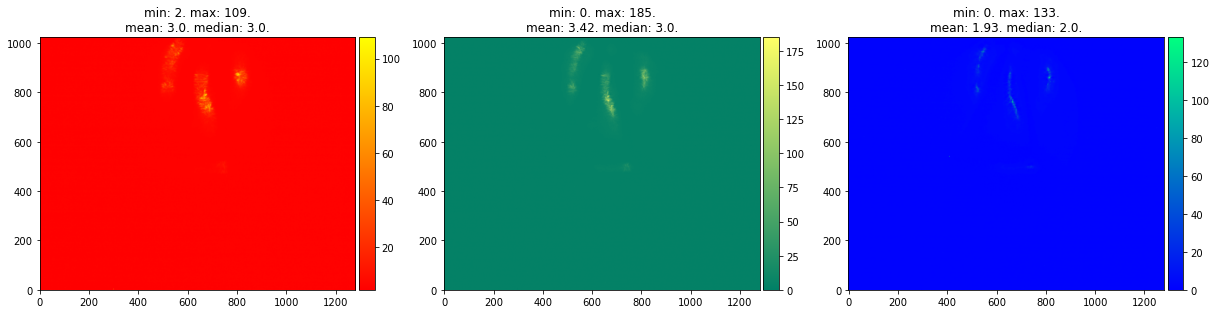

In [2]:
exp.cam.auto_expose(target=200, E_start=2.0)

In [4]:
exp.cam.auto_roi(mode='peak', width=10, show=True)

12:37    Selecting ROI...


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
def test(dic):
    print(dict(dic))
test({'exposure': 1})

{'exposure': 1}


TAcqTimings(exposure=0.5997992, frame_period=0.8999984000000002)


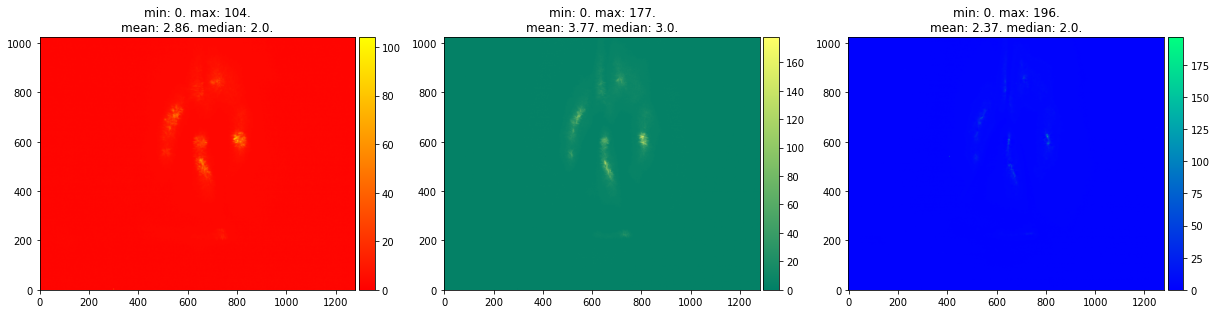

(1, 1024, 1280, 3)


In [2]:
#exp.polarizer.set(90)
# Test if camera works and settings are correct, max pixel count should be 255
t = 0.6
settings = {
    #'pixel_rate':  5000000,
    #'frame_period': 1/0.010,
    #'frame_period': t,
    #'exposure': t,
    #'gains': (1.0, 1.0, 1.0, 1.0),
    #'roi':  (0, 2000, 0, 2000, 1, 1)
    'roi':  (500, 800, 500, 800, 1, 1)
}
#exp.cam.set_settings(settings,False)
exp.cam.instrument.set_frame_period(t*1.5)
exp.cam.instrument.set_exposure(t)
print(exp.cam.instrument.get_frame_timings())

img = exp.cam.take_images(10,True,True)
print(img.shape)

In [4]:
readme = 'test of beetle stokes parameter measurement sequence.'
exp.beetle_polarization(
    mode='create', 
    bounds=[60,140], 
    step_size=5, 
    readme=readme,
    filter=None, 
    pol_steps=16, 
    name='Beetle Hyperspectral',
    path='Experiments\Beetle Hyperspectral', 
    metadata={},
    dark=False,
    nframes=25,
    repeats=5,
)

17:30    Given folder does not exist. If you are on Windows, it might be useful to use double backslashes. This is what you gave as input: 
Experiments\Beetle Hyperspectral

17:30    Using default output folder.
17:30    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments
17:30    Created file 2021.12.23 Beetle Hyperspectral.hdf5
17:30    Created HDF5 group No filter
17:30    Starting measurement.


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

18:02    Error code TE? on device quarter wave plate.


  0%|                                                                                            | 0/5 [57:26<?, ?it/s]

18:28    Got a VisaIOError on device "quarter wave plate" while  executing command "TE?" (attempt 1).


TypeError: 'NoneType' object is not subscriptable

In [5]:
t = 0.15
exp.cam.instrument.set_frame_period(t)
exp.cam.instrument.set_exposure(t)
mode = 'add'
polarization = 'P'
bounds = [35,70]
step_size = 0.2
comment = 'Measurement of brewster angle with color filters. New (much brighter) xenon lamp attached.'
fltr = '350nm'
nframes = 1
repeats = 20

exp.brewster(mode, polarization, bounds, step_size, comment, filter=fltr, 
             name='2021.12.07 Brewster Chromatic - Xenon lamp',nframes=nframes, repeats=repeats)

t = 1.0
exp.cam.instrument.set_frame_period(t)
exp.cam.instrument.set_exposure(t)
polarization = 'S'

exp.brewster(mode, polarization, bounds, step_size, comment, filter=fltr, 
             name='2021.12.07 Brewster Chromatic - Xenon lamp',nframes=nframes, repeats=repeats)

09:48    Given folder does not exist. If you are on Windows, it might be useful to use double backslashes. This is what you gave as input: 
Experiments\Brewster Angle

09:48    Using default output folder.
09:48    Can't change the current working directory for some reason. Changing to default folder.
09:48    Still can't change working directory. Exiting program. Better investigate what's going on!


OSError: 

15:10    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments\Reflection Angle
15:10    Created file 2021.12.10 reflection_angle_small_steps.hdf5
15:10    WARNING. About to measure dark frame. Please make sure all lights are off.


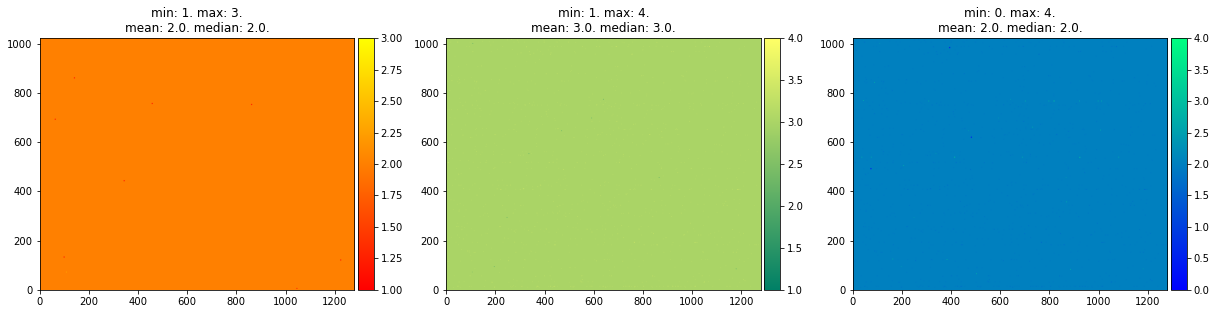

15:11    Captured dark frame.
15:11    Starting measurement.
15:11    Starting run 1


100%|████████████████████████████████████████████████████████████████████████████████| 401/401 [29:56<00:00,  4.48s/it]


15:41    Starting run 2


100%|████████████████████████████████████████████████████████████████████████████████| 401/401 [29:56<00:00,  4.48s/it]


16:11    Starting run 3


100%|████████████████████████████████████████████████████████████████████████████████| 401/401 [29:57<00:00,  4.48s/it]


16:41    Starting run 4


  4%|███                                                                              | 15/401 [01:09<29:48,  4.63s/it]


KeyboardInterrupt: 

In [6]:
bounds = [43,47]
step_size = 0.01
comment = 'Measure distribution of reflection angle. Polarizer set to P polarization.'
name = 'reflection_angle_small_steps'
angle = 45

exp.reflection_angle(bounds, step_size, comment, angle, name=name)

In [7]:
end = (2021,12,6,10,0)
comment = '''\
Measurement of how the intensity of the lamp veries in time. Measured by pointing the camera straight at the lamp.
Other optical elements in setup: quarter wavelength plate and linear polarizer, oriented at 45 an 0 degrees respectively.
600nm filter attached to camera.'''
exp.light_source_variance(end, comment, dark=False, dt=60)

22:53    Can't change the current working directory for some reason. Changing to default folder.
22:53    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments


image_indexing:  rct
frame_format:  list
frame_info_format:  namedtuple
frame_info_period:  1
exposure:  3.9996908
roi:  (400, 900, 300, 700, 1, 1)
subsampling:  (1, 1)
binning:  (1, 1)
pixel_rate:  5000000.0
gains:  (1.0, 1.0, 1.0, 1.0)
gain_boost:  False
color_mode:  rgb8p
frame_period:  3.999978


22:53    Created file Lamp variation from 2021.12.03 to 12.06.hdf5
22:53    Starting light source variation measurement.
22:53    Total time: 2 days, 11.0 hours, and 6.0 minutes.


 94%|████████████████████████████████████████████████████████████████████▎    | 3318/3546 [58:59:19<4:03:12, 64.00s/it]


KeyboardInterrupt: 

In [14]:
exp.big_arm.move(39,'absolute')
exp.name = 'Brewster'
comment = 'Measurement of brewster angle without color filters. Done remotely.'
exp.brewster(comment, dark=False, repeats=1, step_size=0.5, nframes=25, domain=[35,70])

11:33    Moving axis 1 to position 39 degrees.


image_indexing:  rct
frame_format:  list
frame_info_format:  namedtuple
frame_info_period:  1
exposure:  0.119892
roi:  (400, 800, 350, 750, 1, 1)
subsampling:  (1, 1)
binning:  (1, 1)
pixel_rate:  5000000.0
gains:  (1.0, 1.0, 1.0, 1.0)
gain_boost:  False
color_mode:  rgb8p
frame_period:  0.1999848


11:33    Created file 2021.11.29 Brewster.hdf5
11:33    Created HDF5 group P polarization
11:33    Created HDF5 group S polarization
WARNING. About to measure dark frame. Please make sure all lights are off.
Press ENTER to continue.
11:34    Captured dark frame.
Press ENTER to start measurement.
11:34    Starting measurement.
11:34    Starting run 1


 69%|████████████████████████████████████████████████████████▌                         | 49/71 [25:34<11:26, 31.19s/it]

11:59    Error code TE?


100%|██████████████████████████████████████████████████████████████████████████████████| 71/71 [36:56<00:00, 31.21s/it]


12:11    Measurement sequence completed!


In [4]:
name='attempt 2'
readme = '''\
Measurement of the polarization of the lamp. Measured by pointing camera straight at source. No filter attached to camera.'''
bounds = [-360, 360]
step_size = 5
nframes = 50
median = True
overwrite = False
metadata = {'filter': 'None'}
repeats = 50
exp.lamp_polarization(
    bounds, step_size, readme, metadata=metadata, name=name,
    nframes=nframes, repeats=repeats, overwrite=overwrite, median=median, dark=False)

22:20    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments\Lamp Polarization
22:20    Created file 2021.12.15 attempt 2.hdf5
22:20    Starting measurement.
22:20    Moving axis 2 to position 90 degrees.
22:20    Moving axis 1 to position 90 degrees.


  6%|████▊                                                                           | 3/50 [34:38<9:05:04, 695.83s/it]

22:59    Error code TE? on device linear polarizer.


  8%|██████▍                                                                         | 4/50 [46:20<8:55:11, 698.07s/it]

23:13    Error code 1: PCI COMMUNICATION TIME-OUT on device "linear polarizer" while executing command "1PA-40;1WS0".


 10%|████████                                                                        | 5/50 [58:04<8:45:22, 700.49s/it]

23:26    Error code TE? on device quarter wave plate.


 20%|███████████████▍                                                             | 10/50 [1:56:33<7:47:43, 701.60s/it]

00:19    Error code TE? on device linear polarizer.


 24%|██████████████████▍                                                          | 12/50 [2:19:56<7:24:25, 701.72s/it]

00:45    Error code TE? on device linear polarizer.
00:47    Error code 1: PCI COMMUNICATION TIME-OUT on device "linear polarizer" while executing command "1PA-15;1WS0".


 26%|████████████████████                                                         | 13/50 [2:31:41<7:13:17, 702.65s/it]

00:56    Error code TE? on device linear polarizer.


 30%|███████████████████████                                                      | 15/50 [2:55:05<6:49:35, 702.16s/it]

01:22    Error code TE? on device linear polarizer.


 38%|█████████████████████████████▎                                               | 19/50 [3:41:52<6:02:38, 701.87s/it]

02:08    Got a VisaIOError on device "linear polarizer" while  executing command "1PA-195;1WS0".
02:08    Error code 1: PCI COMMUNICATION TIME-OUT on device "linear polarizer" while executing command "1PA-195;1WS0".
02:15    Error code TE? on device quarter wave plate.


 40%|██████████████████████████████▊                                              | 20/50 [3:55:46<6:10:50, 741.69s/it]

02:20    Error code TE? on device quarter wave plate.
02:24    Error code TE? on device linear polarizer.


 46%|███████████████████████████████████▍                                         | 23/50 [4:30:51<5:21:53, 715.33s/it]

02:56    Error code TE? on device linear polarizer.


 54%|█████████████████████████████████████████▌                                   | 27/50 [5:17:38<4:30:15, 705.04s/it]

03:50    Error code TE? on device linear polarizer.


 56%|███████████████████████████████████████████                                  | 28/50 [5:29:20<4:18:09, 704.05s/it]

04:00    Error code TE? on device quarter wave plate.


 58%|████████████████████████████████████████████▋                                | 29/50 [5:41:01<4:06:06, 703.16s/it]

04:09    Error code TE? on device quarter wave plate.


 66%|██████████████████████████████████████████████████▊                          | 33/50 [6:27:47<3:18:55, 702.06s/it]

04:56    Error code 1: PCI COMMUNICATION TIME-OUT on device "linear polarizer" while executing command "1PA95;1WS0".
04:58    Error code TE? on device linear polarizer.


 72%|███████████████████████████████████████████████████████▍                     | 36/50 [7:02:56<2:43:52, 702.33s/it]

05:28    Error code TE? on device linear polarizer.
05:29    Error code TE? on device linear polarizer.


 92%|████████████████████████████████████████████████████████████████████████▋      | 46/50 [8:59:53<46:47, 701.82s/it]

07:31    Error code TE? on device linear polarizer.


100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [9:46:40<00:00, 704.01s/it]


08:07    Measurement sequence completed!


In [6]:
name = 'Median test - S polarization large set '
readme = 'Measuring how much single measurement varies over time due to lamp to get brightness distribution of lamp.'
nframes = 200
repeats = 20
dt = 10
polarization = 0
exp.median_test(readme, dt, polarization, name, dark=False, nframes=nframes, repeats=repeats, overwrite=False)

16:17    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments\Median Test
16:17    Created file 2021.12.15 Median test - S polarization large set .hdf5
16:17    Starting measurement.
16:17    Acquiring 200 frames 20 times 10 seconds apart.


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [05:49<00:00, 17.46s/it]


16:23    Measurement sequence completed!
